In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/home/bartek/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [7]:
import types

class A:    
    def meth1(self, par1):
        print("in A.meth1: par1 =", par1)

a = A()
s = '''def meth1(self, par1):
    print("in recompiled A.meth1: par1 = ", par1)'''

In [10]:
def compileUnit(source):
        # compile code
        foo_code = compile(source, "<string>", "exec")
        foo_ns = {}
        exec(foo_code,foo_ns)
        return  types.MethodType(foo_ns["meth1"], A)

        

In [11]:
a.meth1=compileUnit(s)
a.meth1('avb')

in recompiled A.meth1: par1 =  avb


In [ ]:
#code = compile(s, __file__, "exec")

#environment = {}
exec(code, environment)
a.meth1 = types.MethodType(environment["meth1"], A)

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

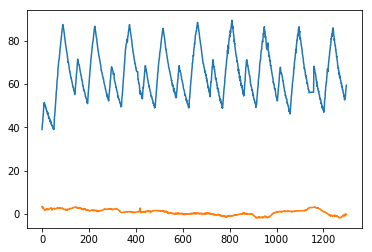

In [102]:
Pdataset = pandas.read_csv('piec.csv', usecols=[2,3], engine='python', skipfooter=3)
plt.plot(Pdataset)
plt.show()

In [103]:
Pdataset.tail(4)

,V1,V2
1295,56.75,0.0
1296,57.25,0.0
1297,58.75,0.0
1298,59.50,-0.2


In [104]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(Pdataset)

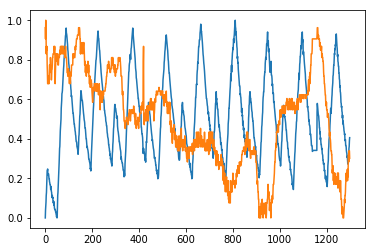

In [105]:
plt.plot(dataset)
plt.show()

In [106]:
dataset

array([[0.        , 0.96226415],
       [0.03960396, 0.90566038],
       [0.05940594, 1.        ],
       ...,
       [0.36138614, 0.33962264],
       [0.39108911, 0.33962264],
       [0.40594059, 0.30188679]])

In [107]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

870 429


In [108]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [112]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

ValueError: cannot reshape array of size 16980 into shape (849,2,1)

In [111]:
trainX.shape
dataset.shape

(1299, 2)

In [90]:
trainX.reshape(-1,4)

array([[0.        , 0.03960396, 0.05940594, 0.07920792],
       [0.11386139, 0.12871287, 0.17326733, 0.2029703 ],
       [0.23762376, 0.23762376, 0.24752475, 0.22277228],
       ...,
       [0.34653465, 0.32673267, 0.35148515, 0.32673267],
       [0.30693069, 0.32178218, 0.35148515, 0.36633663],
       [0.41584158, 0.43069307, 0.44554455, 0.5049505 ]])

In [91]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0488
Epoch 2/100
 - 1s - loss: 0.0026
Epoch 3/100
 - 1s - loss: 0.0016
Epoch 4/100
 - 1s - loss: 0.0012
Epoch 5/100
 - 1s - loss: 8.6726e-04
Epoch 6/100
 - 1s - loss: 7.8560e-04
Epoch 7/100
 - 1s - loss: 6.2445e-04
Epoch 8/100
 - 1s - loss: 6.4299e-04
Epoch 9/100
 - 1s - loss: 6.1993e-04
Epoch 10/100
 - 1s - loss: 6.0694e-04
Epoch 11/100
 - 1s - loss: 5.5878e-04
Epoch 12/100
 - 1s - loss: 5.0765e-04
Epoch 13/100
 - 1s - loss: 4.7427e-04
Epoch 14/100
 - 1s - loss: 4.6814e-04
Epoch 15/100
 - 1s - loss: 4.5122e-04
Epoch 16/100
 - 1s - loss: 4.1809e-04
Epoch 17/100
 - 1s - loss: 4.0025e-04
Epoch 18/100
 - 1s - loss: 4.0511e-04
Epoch 19/100
 - 1s - loss: 4.2681e-04
Epoch 20/100
 - 1s - loss: 3.9342e-04
Epoch 21/100
 - 1s - loss: 3.6114e-04
Epoch 22/100
 - 1s - loss: 3.8044e-04
Epoch 23/100
 - 1s - loss: 3.6728e-04
Epoch 24/100
 - 1s - loss: 3.6543e-04
Epoch 25/100
 - 1s - loss: 4.0339e-04
Epoch 26/100
 - 1s - loss: 3.5995e-04
Epoch 27/100
 - 1s - loss: 3.4425e-04

In [93]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [94]:
trainPredict

array([[ 1.53433397e-01],
       [ 1.51693806e-01],
       [ 1.55073553e-01],
       [ 1.56510457e-01],
       [ 1.36401862e-01],
       [ 1.45518109e-01],
       [ 1.35684296e-01],
       [ 1.27652645e-01],
       [ 1.22681059e-01],
       [ 1.05556294e-01],
       [ 9.69012156e-02],
       [ 1.01211190e-01],
       [ 9.51661542e-02],
       [ 1.01767302e-01],
       [ 7.80221447e-02],
       [ 7.03070909e-02],
       [ 6.88784420e-02],
       [ 7.46521279e-02],
       [ 6.72801659e-02],
       [ 6.53541759e-02],
       [ 4.71202061e-02],
       [ 3.84105071e-02],
       [ 3.24947126e-02],
       [ 3.08775101e-02],
       [ 3.77744734e-02],
       [ 2.77754832e-02],
       [ 2.63098795e-02],
       [ 1.75414812e-02],
       [ 4.53515677e-03],
       [-2.93959165e-05],
       [ 3.30078555e-03],
       [ 5.58251631e-04],
       [ 9.72525496e-03],
       [ 7.28318766e-02],
       [ 1.27940506e-01],
       [ 1.59519240e-01],
       [ 1.83318883e-01],
       [ 2.18322009e-01],
       [ 2.4

In [95]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [96]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [97]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.755 RMSE
Test Score: 1.018 RMSE


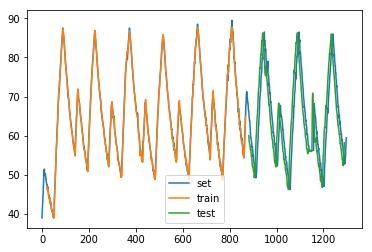

In [98]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)-7:len(dataset)-9, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="set")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()